___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.9.12


In [35]:
# pip install tensorflow

In [3]:
import tensorflow as tf
tf.__version__

'2.10.0'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [7]:
df = pd.read_csv("fake_reg.csv")

In [8]:
df.shape

(1000, 3)

## Exploratory Data Analysis and Visualization

In [9]:
df.head()

price  feature1  feature2
0 461.528   999.788   999.766
1 548.130   998.862  1001.042
2 410.297  1000.070   998.844
3 540.382   999.952  1000.441
4 546.025  1000.446  1000.339

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [11]:
df.describe().T

count     mean    std     min     25%      50%      75%      max
price    1000.000  498.673 93.785 223.347 433.026  502.382  564.922  774.408
feature1 1000.000 1000.014  0.974 997.058 999.332 1000.010 1000.638 1003.208
feature2 1000.000  999.980  0.948 996.996 999.316 1000.002 1000.645 1002.666

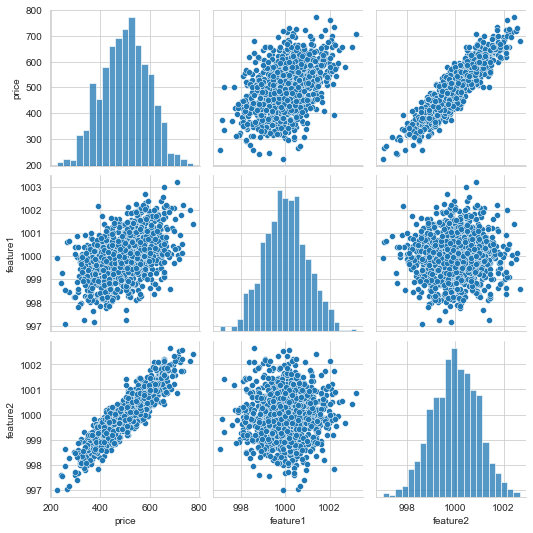

In [12]:
sns.pairplot(df);

In [13]:
df.corr()

price  feature1  feature2
price     1.000     0.444     0.908
feature1  0.444     1.000     0.031
feature2  0.908     0.031     1.000

## Preprocessing of Data
- Train | Test Split, Scalling

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# X = df[['feature1', 'feature2']].values  # convert to array
# y = df['price'].values

In [16]:
X = df[['feature1', 'feature2']] 
y = df['price']

In [17]:
X

feature1  feature2
0     999.788   999.766
1     998.862  1001.042
2    1000.070   998.844
3     999.952  1000.441
4    1000.446  1000.339
..        ...       ...
995  1000.019   999.673
996   998.855  1000.020
997  1001.452   998.848
998  1000.771   998.563
999   999.232  1001.451

[1000 rows x 2 columns]

In [18]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
X_train.shape

(700, 2)

In [21]:
X_test.shape

(300, 2)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
# help(MinMaxScaler)

In [24]:
scaler = MinMaxScaler()

In [25]:
# Gradient Descent te 0 ile 1 arasında çekmek işimizi kolaylaştırır.
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [26]:
import tensorflow as tf

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [28]:
# help(Sequential)

In [29]:
# help(Dense)

In [30]:
X_train.shape

(700, 2)

In [31]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"), # first hidden layer
                    Dense(units = 4, activation = "relu"), # second hidden layer
                    Dense(units = 4, activation = "relu"), # third hidden layer
                    Dense(units = 1)])# last layer katman(single neuron because it is  regression problem. default activation is linear)

# Sequential: Ard arda bağlı olacak model tipimiz
# Input içine de yazabiliriz ayrı ayrı da yazabiliriz alttaki gibi
# Dense : Fully connected layer eklemek demek
# units=4 : 4 nöron olacak(o layer da)
# activation : aktivasyon fonksiyonumuz "relu" olacak 
# input_dim = X_train.shape[1]  /  Input(shape = X_train.shape[1] : Giriş datamın shape i (Bağımsız feature(değişken) sayısı kadar)


In [32]:
# Second way to create model (recommended)

model = Sequential()

# model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1])) # first hidden layer
model.add(Dense(units = 4, activation = "relu")) # second hidden layer
model.add(Dense(units = 4, activation = "relu")) # third hidden layer
model.add(Dense(units = 1)) # last layer katman(single neuron because it is  regression problem. default activation is linear)

# Bu sayıları belirlemenin net bir yolu yok bunu dataya bakarak karar vereceğiz
# Az feature var o yüzden çok hidden layer a gerek yok. Aslında 3 hidden layer da fazla
# Data büyükse nöronlar arttırılabilir, layerlar arttırılabilir vs

In [33]:
model.summary()
# birinci satır
    # Birinci katmanda 4 nöron varmış
    # Batch_size olmadığı için None veriyor
    # Param = 12  .. 4 eşik ve 2(input layer) x 4(birinci hidden layer)=8 toplam 12

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.weights
# Bias leri genelde ilk başta 0 alıyor
# Weightleri random atıyor.

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.2890098 ,  0.35031104, -0.58980155,  0.72489357],
        [ 0.9090154 ,  0.20309305, -0.01033354,  0.45502043]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.2388969 , -0.36118776, -0.64190745,  0.45851415],
        [-0.72786343,  0.01616526, -0.69745195,  0.6142772 ],
        [ 0.12512314,  0.809328  ,  0.85862094, -0.66685027],
        [-0.55980456, -0.13799965,  0.11924124, -0.8425007 ]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.32153565,  0.7474703 , -0.4229833 ,  0.72201806],
        [ 0.10355544,  0.8382949 , -0.02310658, -0.5498537 ],
        [-0.6075729 , -0.49007764,  0.0537

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [47]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [48]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

# Her bir batch de 32 tane satır alacak
# 700(train datası satır sayısı)/32 = 21*32 + 28 satır(22. batch)  --> Toplam 22 iterasyon 
# Her epoch da 22 iterasyon yapacak sonra
# 22 iterasyonun ortalamasını alıyor sonuç veriyor ve update ediyor

# ÖNEMLİ NOT: Hatanın tekrar düzelmesi için tekrar çalıştırabiliriz ama "fit" den itibaren çalıştırırsak
# .. önceden çıkardığı sonuçlar üzerinden gider. Bu sağlıklı değil(local minimuma yakalanmış olabiliriz ve oradan çıkamayız).
# .. Bunun için "Sequential" kısmından itibaren modeli yeniden (belki tekrar tekrar) çalıştırmalıyız. 

# Batch_size ları 2 nin üssü olacak şekilde  seçmekte fayda var çünkü daha hızlı çalışıyor(Başka rakamlarda verebiliriz ama çok büyük datalarda sıkıntı olabilir)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 256530.2344
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256344.8750
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256144.9531
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 255917.5312
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255657.9375
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255361.1250
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255026.1094
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 254651.3594
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254231.5469
Epoch 10/250
22/22 [==============================] - 0s 997us/step - loss: 253761.6406
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 253227.0781
Epoch 12/250
22/22 [==============================] - 0s 1ms/

22/22 [==============================] - 0s 878us/step - loss: 24.4726
Epoch 193/250
22/22 [==============================] - 0s 1ms/step - loss: 24.4336
Epoch 194/250
22/22 [==============================] - 0s 807us/step - loss: 24.1569
Epoch 195/250
22/22 [==============================] - 0s 848us/step - loss: 25.1340
Epoch 196/250
22/22 [==============================] - 0s 796us/step - loss: 24.0051
Epoch 197/250
22/22 [==============================] - 0s 832us/step - loss: 24.3485
Epoch 198/250
22/22 [==============================] - 0s 998us/step - loss: 24.9617
Epoch 199/250
22/22 [==============================] - 0s 844us/step - loss: 24.5424
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 24.8327
Epoch 201/250
22/22 [==============================] - 0s 782us/step - loss: 24.5357
Epoch 202/250
22/22 [==============================] - 0s 886us/step - loss: 24.8448
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 25.0126


In [49]:
model.weights
# Eğitim bittikten sonra initial a göre;
# Biasler değişti
# Weightler değişti

[<tf.Variable 'dense_8/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.9490966 , -0.97440004,  1.1158096 ,  1.8047752 ],
        [ 3.3754156 , -0.01765823,  2.1093533 ,  2.181277  ]],
       dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(4,) dtype=float32, numpy=array([0.5527998 , 0.        , 0.5347122 , 0.56234795], dtype=float32)>,
 <tf.Variable 'dense_9/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 1.0898811 ,  2.7142925 ,  2.0226836 ,  2.0589762 ],
        [-0.35851038,  0.40446693, -0.5942812 ,  0.02834034],
        [ 1.8412869 ,  1.1839907 ,  1.8512759 ,  0.6084813 ],
        [ 1.5705086 ,  1.991397  ,  2.0245924 ,  1.8579587 ]],
       dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(4,) dtype=float32, numpy=array([0.33687735, 0.5230086 , 0.5473541 , 0.17820919], dtype=float32)>,
 <tf.Variable 'dense_10/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 1.9364583 ,  1.4646263 ,  0.90577465,  0.49955896],
        [ 2.3303182 ,  0.1949036 ,  1.6

In [50]:
model.history.history
# Her bir epoch daki loss ları gösteriyor

{'loss': [256530.234375,
  256344.875,
  256144.953125,
  255917.53125,
  255657.9375,
  255361.125,
  255026.109375,
  254651.359375,
  254231.546875,
  253761.640625,
  253227.078125,
  252624.640625,
  251944.09375,
  251180.5,
  250313.421875,
  249342.40625,
  248257.078125,
  247047.21875,
  245704.453125,
  244232.703125,
  242624.5,
  240868.75,
  238957.921875,
  236884.875,
  234638.90625,
  232213.96875,
  229598.171875,
  226791.84375,
  223786.0625,
  220582.078125,
  217160.046875,
  213490.96875,
  209557.84375,
  205396.75,
  200963.421875,
  196277.890625,
  191320.09375,
  186083.4375,
  180579.71875,
  174836.09375,
  168819.171875,
  162542.015625,
  156005.90625,
  149223.5625,
  142245.796875,
  135019.671875,
  127628.3984375,
  120016.7578125,
  112285.6796875,
  104410.5625,
  96452.9609375,
  88488.5546875,
  80438.9609375,
  72506.0625,
  64618.40625,
  56939.7265625,
  49399.6328125,
  42186.51171875,
  35331.9921875,
  28892.337890625,
  23003.109375,
  177

In [51]:
pd.DataFrame(model.history.history)

loss
0   256530.234
1   256344.875
2   256144.953
3   255917.531
4   255657.938
..         ...
245     24.653
246     24.781
247     24.197
248     24.966
249     24.931

[250 rows x 1 columns]

<AxesSubplot:>

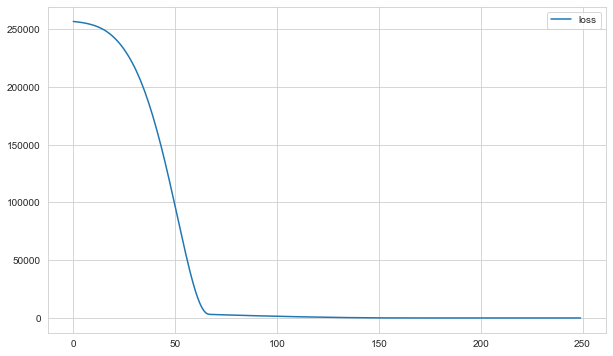

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

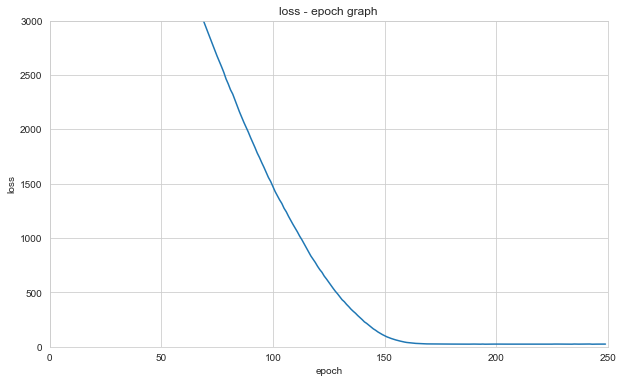

In [53]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [55]:
model.evaluate(X_train, y_train, verbose=0) # En son elde ettiği MSE değerini gösteriyor(Train için)

23.978286743164062

In [56]:
model.evaluate(X_test, y_test, verbose=0) # En son elde ettiği MSE değerini gösteriyor(Test için)

24.966468811035156

In [57]:
y_pred = model.predict(X_test)
y_pred.shape

10/10 [==============================] - 0s 1ms/step


(300, 1)

In [58]:
y_test.shape

(300,)

In [59]:
y_pred.reshape(-1,).shape

(300,)

In [60]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

Actual    Pred
328 621.119 618.443
649 467.669 468.435
925 503.050 510.651
7   417.570 416.725
298 511.367 512.101
687 507.443 501.704
63  537.607 536.167
49  514.882 511.112
81  468.357 469.942
868 320.228 313.751

<AxesSubplot:xlabel='Actual', ylabel='Pred'>

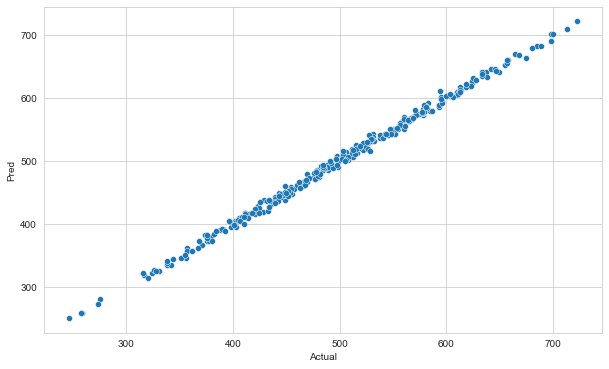

In [61]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [62]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [63]:
eval_metric(y_test, y_pred)

r2_score: 0.9971603279228788 
mae: 4.0000975438754836 
mse: 24.96648682143802 
rmse: 4.996647558257238


## Final Model and Model Deployment

### Final Model Training

In [64]:
scaler = MinMaxScaler().fit(X)

In [65]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [66]:
X_scaled = scaler.transform(X)

In [67]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

# input_dim = 2 or input_dim = X_train.shape[1] : Bunu kullanmazsam final_model.summary() dediğimde hata verir
# .. ama fit yapıp sonra final_model.summary() yaparsam hata vermez çünkü fit kısmında "X_scaled" dan input size ı görüyor
# .. o yüzden input_dim = 2 or input_dim = X_train.shape[1] yazmadık

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 258112.5625
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 257617.0469
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 257180.6094
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 256884.5938
Epoch 5/250
32/32 [==============================] - 0s 946us/step - loss: 256604.2500
Epoch 6/250
32/32 [==============================] - 0s 973us/step - loss: 256295.2188
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 255939.9219
Epoch 8/250
32/32 [==============================] - 0s 845us/step - loss: 255541.8750
Epoch 9/250
32/32 [==============================] - 0s 919us/step - loss: 255088.2812
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 254572.7969
Epoch 11/250
32/32 [==============================] - 0s 1ms/step - loss: 253991.8750
Epoch 12/250
32/32 [==============================] - 0

32/32 [==============================] - 0s 1ms/step - loss: 1242.0090
Epoch 98/250
32/32 [==============================] - 0s 1ms/step - loss: 1208.6273
Epoch 99/250
32/32 [==============================] - 0s 1ms/step - loss: 1174.7639
Epoch 100/250
32/32 [==============================] - 0s 1ms/step - loss: 1138.2230
Epoch 101/250
32/32 [==============================] - 0s 1ms/step - loss: 1104.2823
Epoch 102/250
32/32 [==============================] - 0s 1ms/step - loss: 1069.5413
Epoch 103/250
32/32 [==============================] - 0s 1ms/step - loss: 1028.0413
Epoch 104/250
32/32 [==============================] - 0s 1ms/step - loss: 1002.7615
Epoch 105/250
32/32 [==============================] - 0s 871us/step - loss: 972.9771
Epoch 106/250
32/32 [==============================] - 0s 1ms/step - loss: 942.1335
Epoch 107/250
32/32 [==============================] - 0s 1ms/step - loss: 913.1647
Epoch 108/250
32/32 [==============================] - 0s 865us/step - loss: 882.3

In [68]:
final_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 12        
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [69]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

# Peki ne kaydediyor? Alttakileri
"""
The weight values
The model's architecture
The model's training configuration (what you pass to the .compile() method)
The optimizer and its state, if any (this enables you to restart training where you left off)
"""

In [70]:
#final_model.save("model_fake_reg") 

### Loading Model

In [71]:
from tensorflow.keras.models import load_model

In [72]:
model_fake_reg = load_model('model_fake_reg.h5') # h5 yazmazsak default format var bir tane o formatta kaydediyor

In [73]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb")) # Scaler pickle ile yapılıyordu. Bunu pickle ile aldık

## Prediction-1

In [74]:
sample = [[998, 1000]]

In [75]:
sample_scaled = scaler_fake_reg.transform(sample)

In [76]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 96ms/step


array([[419.32352]], dtype=float32)

## Prediction-2

In [77]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [78]:
sample = pd.DataFrame(my_dict)
sample

Feature1  Feature2
0       997      1000
1       998       999
2       999       998
3      1000       997
4      1001       996

In [79]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [80]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 29ms/step


array([[379.23328],
       [330.85687],
       [282.48044],
       [234.10402],
       [185.72758]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___